# 🧠Análisis de señales sEMG del dataset PhysioNet

Este notebook tiene como objetivo **cargar, explorar y visualizar señales de electromiografía superficial (sEMG)** obtenidas del **Sujeto 2 (S2)** del dataset público de PhysioNet:  
[PhysioNet sEMG Hand Movement Dataset](https://physionet.org/content/semg/1.0.1/).

## 📂 1. Información del dataset  

- **Duración del registro:** 60 segundos continuos.  
- **Frecuencia de muestreo:** 2000 Hz.  
- **Canales disponibles:** 10 señales sEMG (5 por extremidad).  
- **Músculos registrados en cada pierna (LT = izquierda, RT = derecha):**  
  - Tibialis Anterior  
  - Gastrocnemius Lateralis  
  - Rectus Femoris  
  - Hamstring  
  - Vastus Lateralis  
- **Formato:** archivos `.dat` y `.hea` accesibles mediante `wfdb`.

## 🎯 2. Objetivos del análisis  

1. Cargar el registro remoto desde PhysioNet.  
2. Identificar los **canales sEMG** entre todos los sensores disponibles.  
3. Separar las señales en **lado izquierdo vs lado derecho**.  
4. Visualizar la actividad cruda de cada músculo para ambas extremidades.  

## ⚙️ 3. Relevancia técnica  

- Las señales sEMG permiten evaluar la **activación muscular** y estudiar la **simetría entre extremidades**.  
- El muestreo a 2000 Hz asegura la captura de **eventos rápidos de activación neuromuscular**.  
- Este análisis inicial se centra en la **visualización cruda**; pasos posteriores incluirán **filtrado, normalización y análisis espectral**.  

## 📚 4. Importación de librerías
Se importan las librerías necesarias para cargar y visualizar los datos:
- **wfdb**: para leer los registros desde PhysioNet.
- **matplotlib**: para graficar las señales.

In [ ]:
import wfdb
import matplotlib.pyplot as plt

## 📡 3. Carga del registro  
Se carga el registro del **Sujeto 2 (S2)** desde PhysioNet y se extraen:  
- La matriz de señales crudas (`p_signal`).  
- Los nombres de los canales (`sig_name`).  
- La frecuencia de muestreo (`fs`).  

In [50]:
record = wfdb.rdrecord("S2", pn_dir="semg/1.0.1")

# Extracción de información relevante del registro
signals = record.p_signal     # Matriz [N_muestras x N_canales]
channels = record.sig_name    # Nombres de los canales
fs = record.fs                # Frecuencia de muestreo

## 🔎 4. Identificación de canales sEMG  
El registro incluye distintos tipos de señales, por lo que se filtran únicamente aquellas correspondientes a **sEMG**.  
Esto asegura que el análisis se centre exclusivamente en la actividad muscular registrada y no en señales auxiliares.  

In [49]:
# 3. Seleccionar únicamente los canales EMG
emg_channels = [i for i, ch in enumerate(channels) if "semg" in ch.lower()]
print("Canales EMG encontrados:", [channels[i] for i in emg_channels])
print("Frecuencia de muestreo:", fs, "Hz")

Canales EMG encontrados: ['semg LT TIB.A', 'semg LT LAT.G', 'semg LT REC.F', 'semg LT HAM', 'semg LT LAT.V', 'semg RT TIB.A', 'semg RT LAT.G', 'semg RT REC.F', 'semg RT HAM', 'semg RT LAT.V']
Frecuencia de muestreo: 2000 Hz


## ⏱️ 5. Definición del eje temporal  
Se construye el eje temporal considerando **60 segundos de duración** y una frecuencia de **2000 Hz**.  

In [ ]:
# 4. Definir el eje temporal (60 s de grabación -> 60*fs muestras)
n_samples = int(60 * fs)
t = [i/fs for i in range(n_samples)]

## ↔️ 6. Separación por extremidad  
Los 10 canales se dividen en dos grupos:  
- **Izquierda (LT)** → primeros 5 músculos.  
- **Derecha (RT)** → últimos 5 músculos.  

In [55]:
# 5. Dividir los canales EMG en dos mitades (ej. lado izquierdo vs derecho)
n = len(emg_channels)
half = n // 2
first_half = emg_channels[:half]
second_half = emg_channels[half:]

# # Selección de los canales a graficar
# Si quieres la primera mitad -> usar first_half
# Si quieres la segunda mitad -> usar second_half
selected_channels = first_half   
selected_channels2 = second_half

## 📊 7. Visualización: lado izquierdo (LT)  
Se grafican los 5 músculos de la pierna izquierda (LT), cada uno en un subplot.

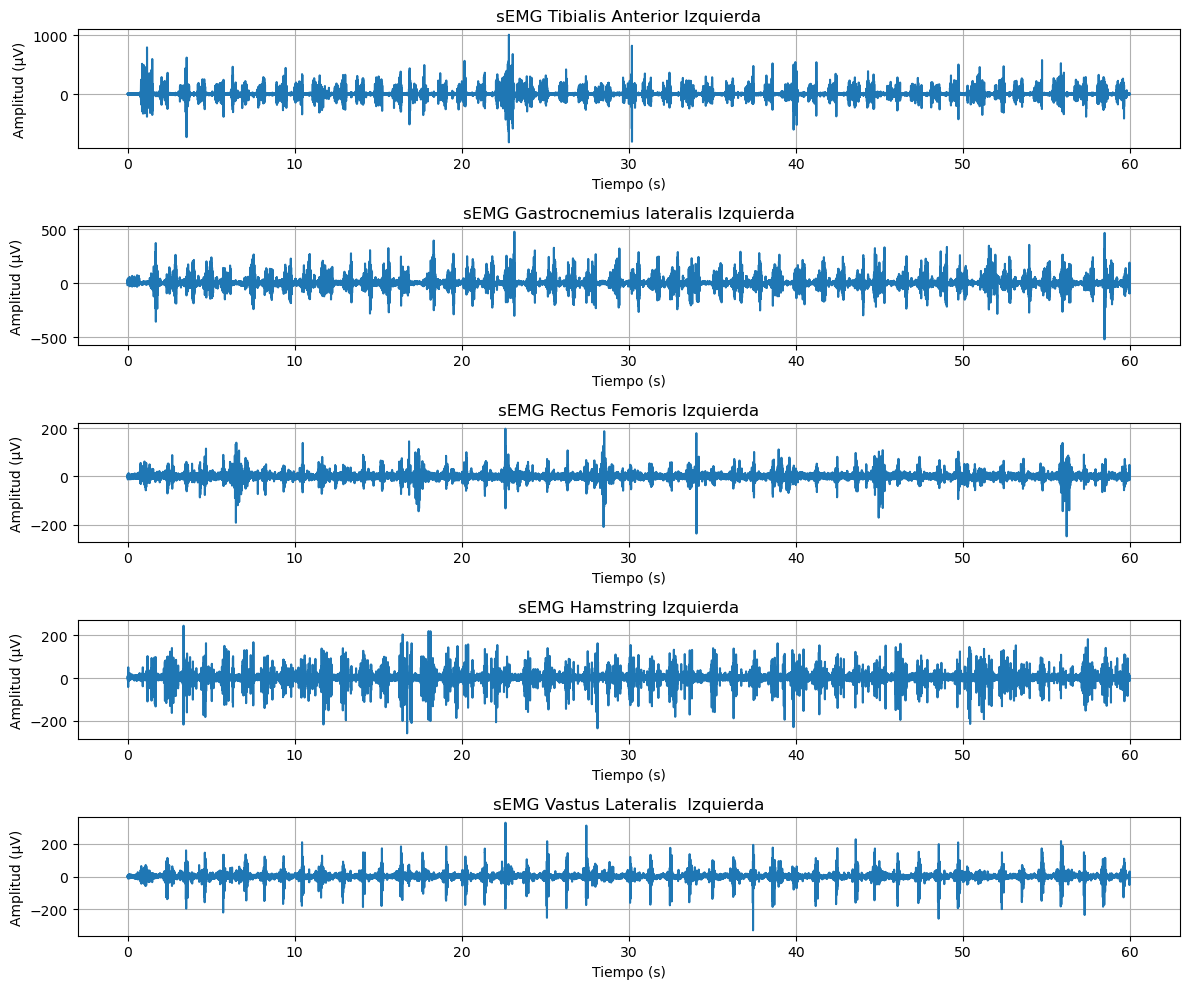

In [56]:
# 6. Graficar señales EMG (Izquierda)
plt.figure(figsize=(12, 2*len(selected_channels)))
for i, idx in enumerate(selected_channels):
    plt.subplot(len(selected_channels), 1, i+1)
    plt.plot(t, signals[:n_samples, idx])
    # Etiquetado manual por músculo
    if i == 0:
        plt.title("sEMG Tibialis Anterior Izquierda")
    elif i == 1: 
        plt.title("sEMG Gastrocnemius lateralis Izquierda")
    elif i == 2: 
        plt.title("sEMG Rectus Femoris Izquierda")
    elif i == 3:
        plt.title("sEMG Hamstring Izquierda")
    elif i == 4:
        plt.title("sEMG Vastus Lateralis  Izquierda")
    plt.xlabel("Tiempo (s)") # escala temporal
    plt.ylabel("Amplitud (µV)") # amplitud en microvoltios
    plt.grid(True)

plt.tight_layout()
plt.show()


## 📊 8. Visualización: lado derecho (RT)  
Se grafican los 5 músculos de la pierna derecha (RT), comparables con los del lado izquierdo.  

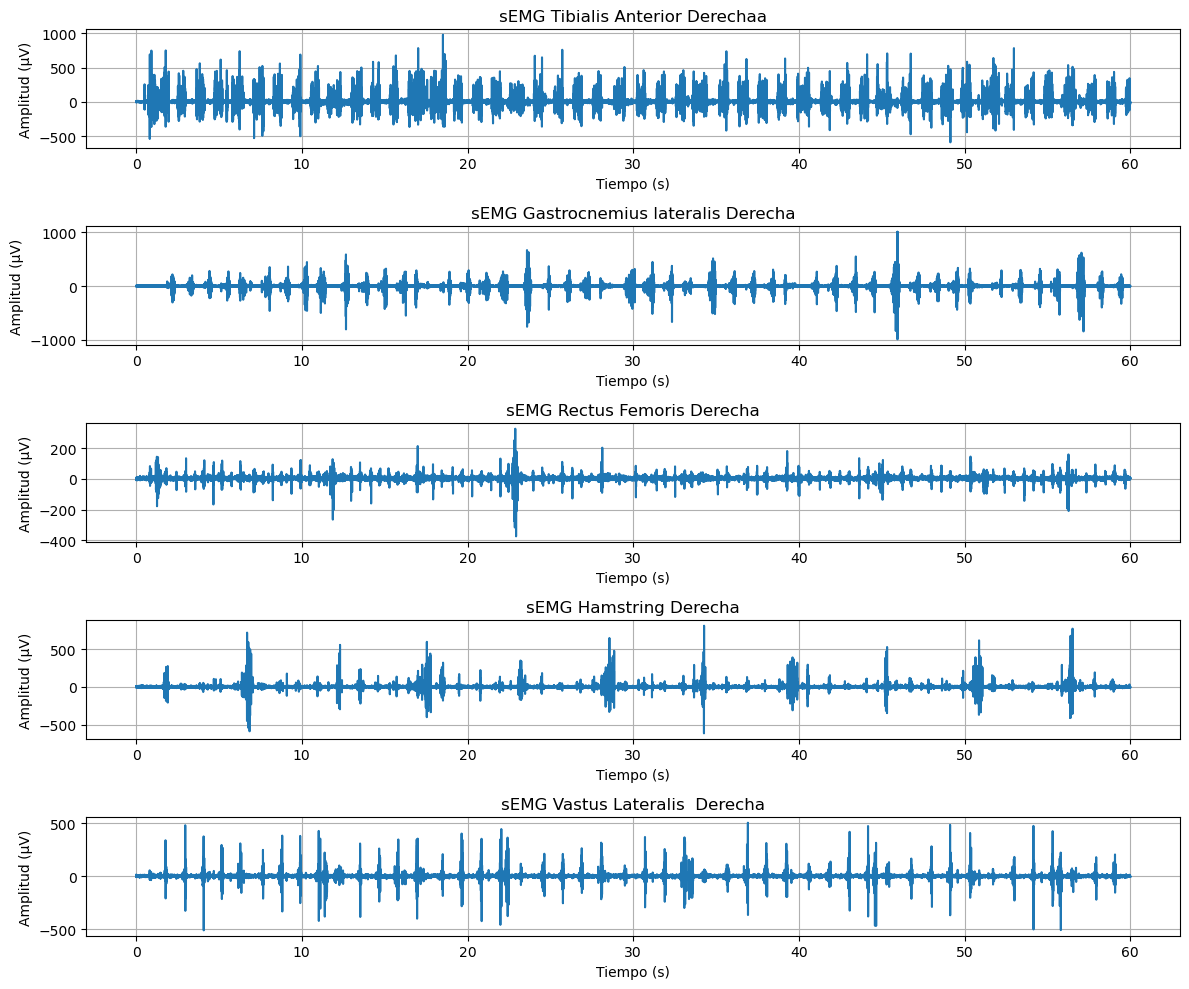

In [57]:
# 6. Graficar señales EMG (Derecha)
plt.figure(figsize=(12, 2*len(selected_channels2)))
for i, idx in enumerate(selected_channels2):
    plt.subplot(len(selected_channels2), 1, i+1)
    plt.plot(t, signals[:n_samples, idx])
    # Etiquetado manual por músculo
    if i == 0:
        plt.title("sEMG Tibialis Anterior Derechaa")
    elif i == 1: 
        plt.title("sEMG Gastrocnemius lateralis Derecha")
    elif i == 2: 
        plt.title("sEMG Rectus Femoris Derecha")
    elif i == 3:
        plt.title("sEMG Hamstring Derecha")
    elif i == 4:
        plt.title("sEMG Vastus Lateralis  Derecha")
    plt.xlabel("Tiempo (s)") # escala temporal
    plt.ylabel("Amplitud (µV)") # amplitud en microvoltios
    plt.grid(True)

plt.tight_layout()
plt.show()